In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
import pickle
from sklearn.metrics import roc_curve


In [3]:
df_data = pd.read_csv("adult.csv")

In [ ]:
df_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [5]:
df_data["country"].value_counts().index[0]

' United-States'

In [6]:
df_data = df_data.drop(['fnlwgt', 'education-num'], axis = 1)

In [7]:
col_names = df_data.columns

In [8]:
df_data["salary"].value_counts()

,count
salary,
<=50K,24720
>50K,7841


In [9]:
for c in col_names:
    df_data = df_data.replace("?", np.nan)
df_data = df_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [10]:
category_col =['workclass', 'education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex', 'country', 'salary']
labelEncoder = preprocessing.LabelEncoder()

mapping_dict ={}
for col in category_col:
    df_data[col] = labelEncoder.fit_transform(df_data[col])

    le_name_mapping = dict(zip(labelEncoder.classes_,
                        labelEncoder.transform(labelEncoder.classes_)))

    mapping_dict[col]= le_name_mapping
print(mapping_dict)

{'workclass': {' ?': np.int64(0), ' Federal-gov': np.int64(1), ' Local-gov': np.int64(2), ' Never-worked': np.int64(3), ' Private': np.int64(4), ' Self-emp-inc': np.int64(5), ' Self-emp-not-inc': np.int64(6), ' State-gov': np.int64(7), ' Without-pay': np.int64(8)}, 'education': {' 10th': np.int64(0), ' 11th': np.int64(1), ' 12th': np.int64(2), ' 1st-4th': np.int64(3), ' 5th-6th': np.int64(4), ' 7th-8th': np.int64(5), ' 9th': np.int64(6), ' Assoc-acdm': np.int64(7), ' Assoc-voc': np.int64(8), ' Bachelors': np.int64(9), ' Doctorate': np.int64(10), ' HS-grad': np.int64(11), ' Masters': np.int64(12), ' Preschool': np.int64(13), ' Prof-school': np.int64(14), ' Some-college': np.int64(15)}, 'marital-status': {' Divorced': np.int64(0), ' Married-AF-spouse': np.int64(1), ' Married-civ-spouse': np.int64(2), ' Married-spouse-absent': np.int64(3), ' Never-married': np.int64(4), ' Separated': np.int64(5), ' Widowed': np.int64(6)}, 'occupation': {' ?': np.int64(0), ' Adm-clerical': np.int64(1), ' A

Text(0.5, 1.0, '<=50K Income vs >50K Income Count')

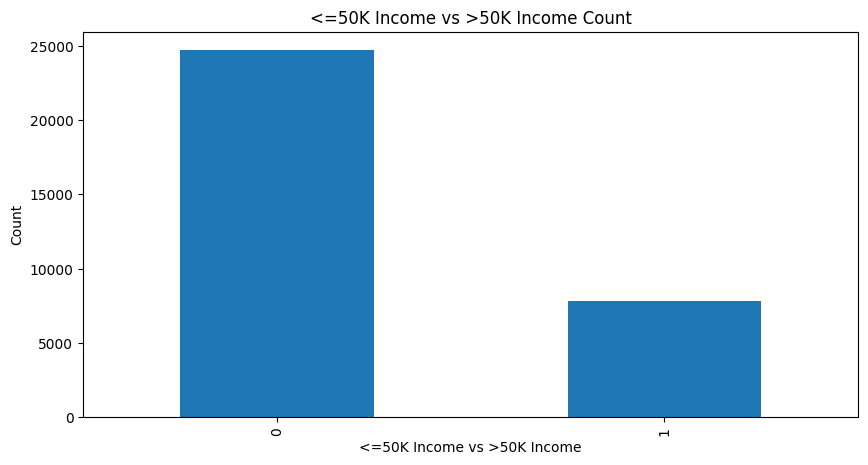

In [11]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = df_data.salary.value_counts().plot(kind = 'bar')
plt.xlabel("<=50K Income vs >50K Income")
plt.ylabel("Count")
plt.title("<=50K Income vs >50K Income Count")

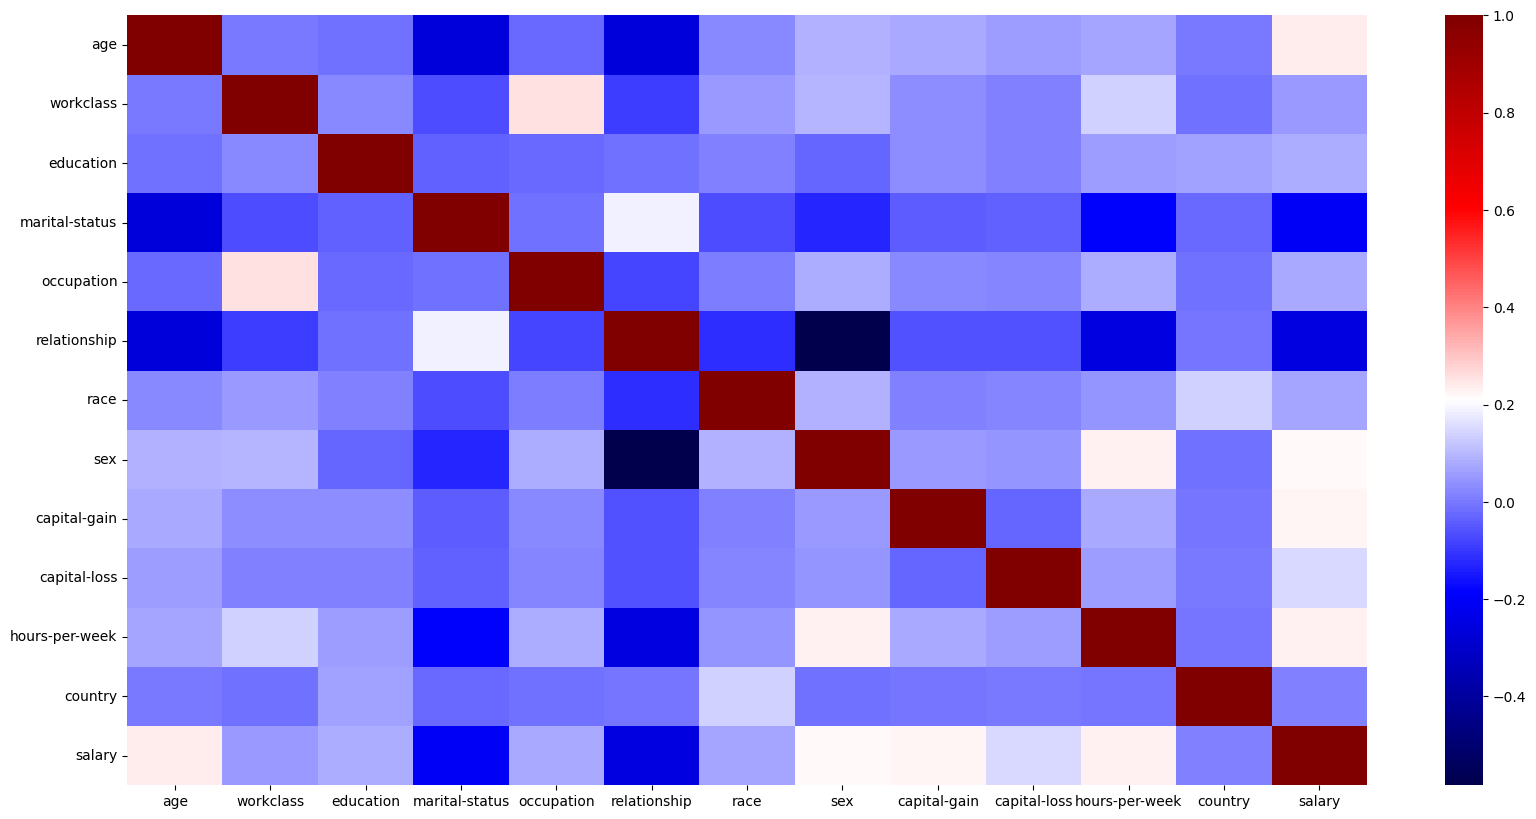

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_data.corr(), cmap="seismic")
plt.show()

In [13]:
X = df_data.drop('salary', axis = 1)
Y = df_data['salary']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

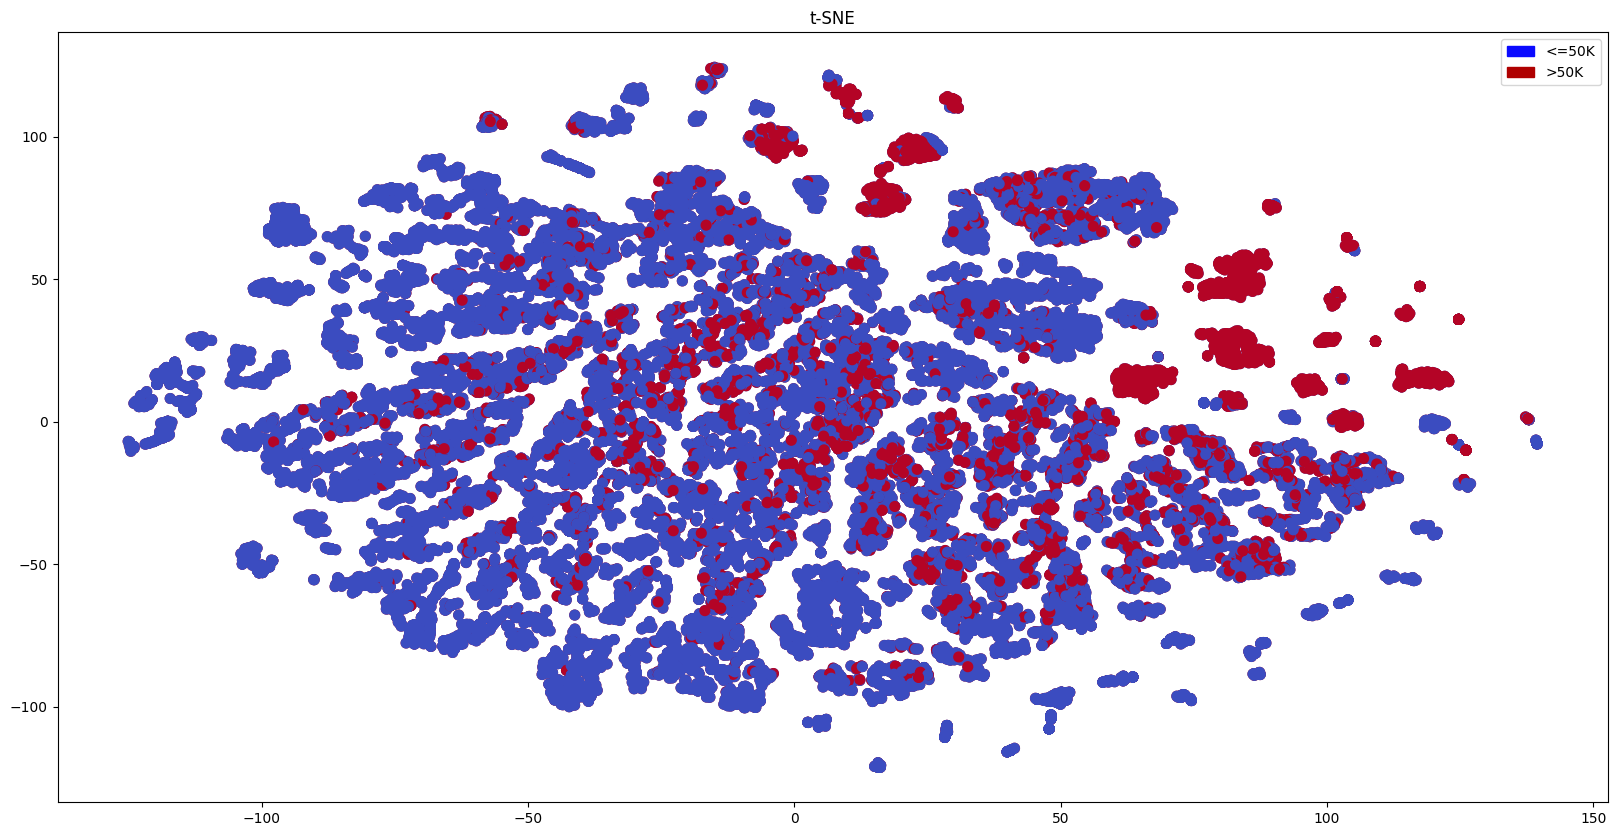

In [ ]:
blue_patch = mpatches.Patch(color='#0A0AFF', label='<=50K')
red_patch = mpatches.Patch(color='#AF0000', label='>50K')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 0), cmap='coolwarm', label='<=50K', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(Y == 1), cmap='coolwarm', label='>50K', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
y_probs = rf.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, y_probs)
rf_fp, rf_tp, rf_threshold = roc_curve(y_test, ypred)
print("Threshold:", rf_threshold)

[[6866  562]
 [ 890 1451]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7428
           1       0.72      0.62      0.67      2341

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

Accuracy Score: 0.8513665677141979
Recall Score: 0.6198205894916702
Precision Score: 0.7208147044212618
ROC AUC Score:  0.7720804616817534
Threshold: [inf  1.  0.]


In [16]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
gbc_fp, gbc_tp, gbc_threshold = roc_curve(y_test, ypred)
print("Threshold:", gbc_threshold)

[[7035  393]
 [ 905 1436]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7428
           1       0.79      0.61      0.69      2341

    accuracy                           0.87      9769
   macro avg       0.84      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769

Accuracy Score: 0.8671307196232982
Recall Score: 0.6134130713370355
Precision Score: 0.7851284855112083
ROC AUC Score:  0.7802525776717487
Threshold: [inf  1.  0.]


In [17]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)
ypred = abc.predict(X_test)
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
print("Accuracy Score:", accuracy_score(y_test, ypred))
print("Recall Score:", recall_score(y_test, ypred))
print("Precision Score:", precision_score(y_test, ypred))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
abc_fp, abc_tp, abc_threshold = roc_curve(y_test, ypred)
print("Threshold:", abc_threshold)

[[7010  418]
 [ 998 1343]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7428
           1       0.76      0.57      0.65      2341

    accuracy                           0.86      9769
   macro avg       0.82      0.76      0.78      9769
weighted avg       0.85      0.86      0.85      9769

Accuracy Score: 0.8550516941345071
Recall Score: 0.5736864587782998
Precision Score: 0.7626348665530949
ROC AUC Score:  0.7587064496368612
Threshold: [inf  1.  0.]


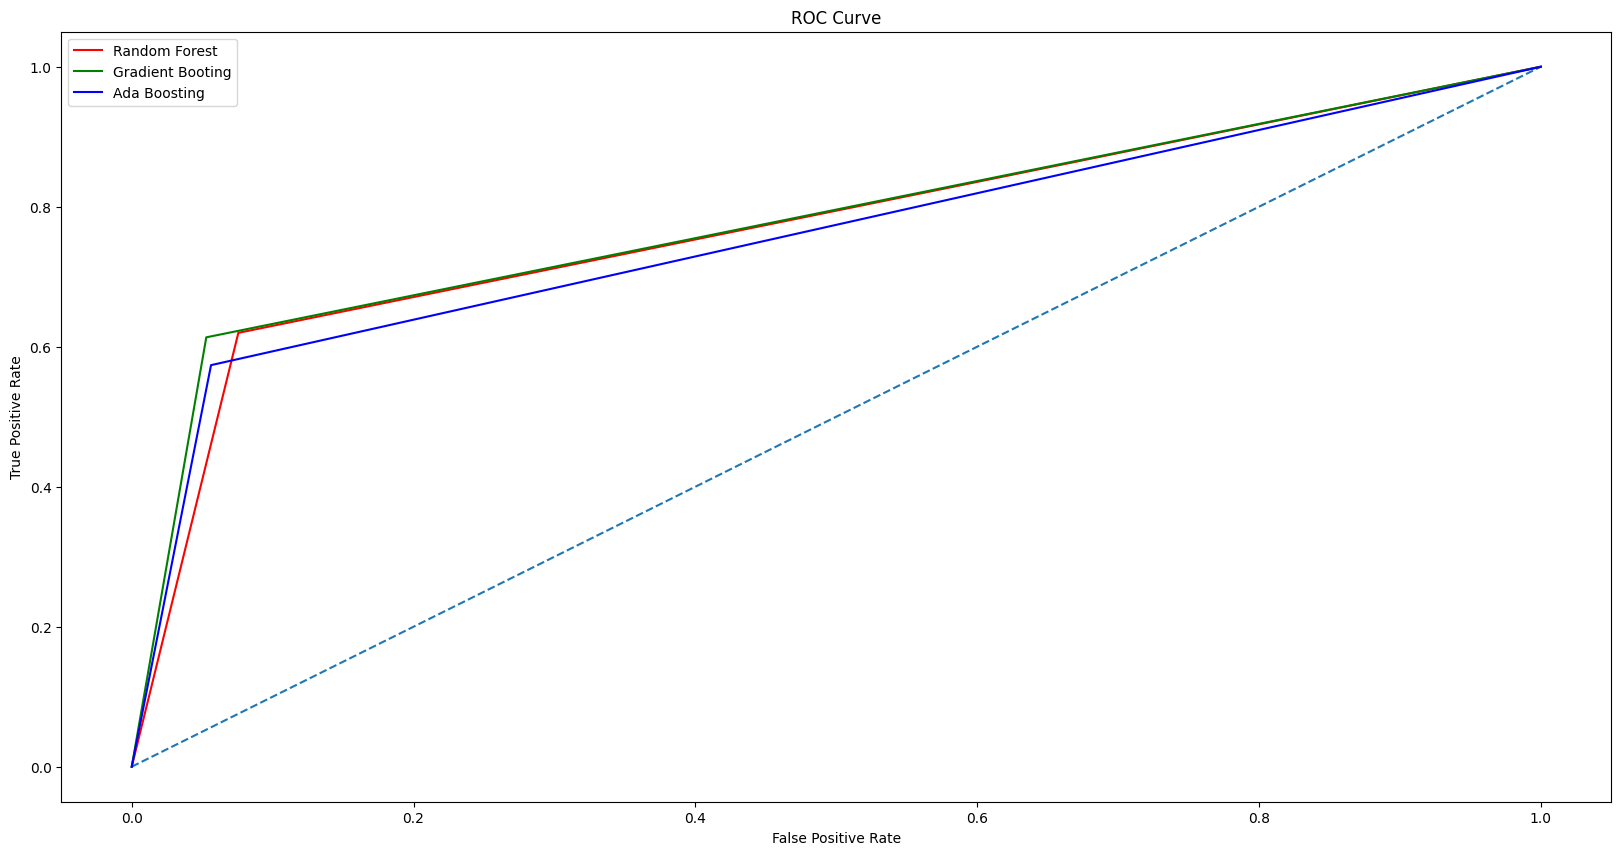

In [18]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(rf_fp, rf_tp, color="red", label = "Random Forest")
plt.plot(gbc_fp, gbc_tp, color="green", label = "Gradient Booting")
plt.plot(abc_fp, abc_tp, color="blue", label = "Ada Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

In [19]:
feature_importance_df = pd.DataFrame(X_train.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
0,age,0.224647
8,capital-gain,0.130645
5,relationship,0.114418
10,hours-per-week,0.112314
2,education,0.102435
4,occupation,0.094305
3,marital-status,0.068784
1,workclass,0.052675
9,capital-loss,0.045608
11,country,0.021752


Text(0.5, 1.0, 'Plot Feature Importances')

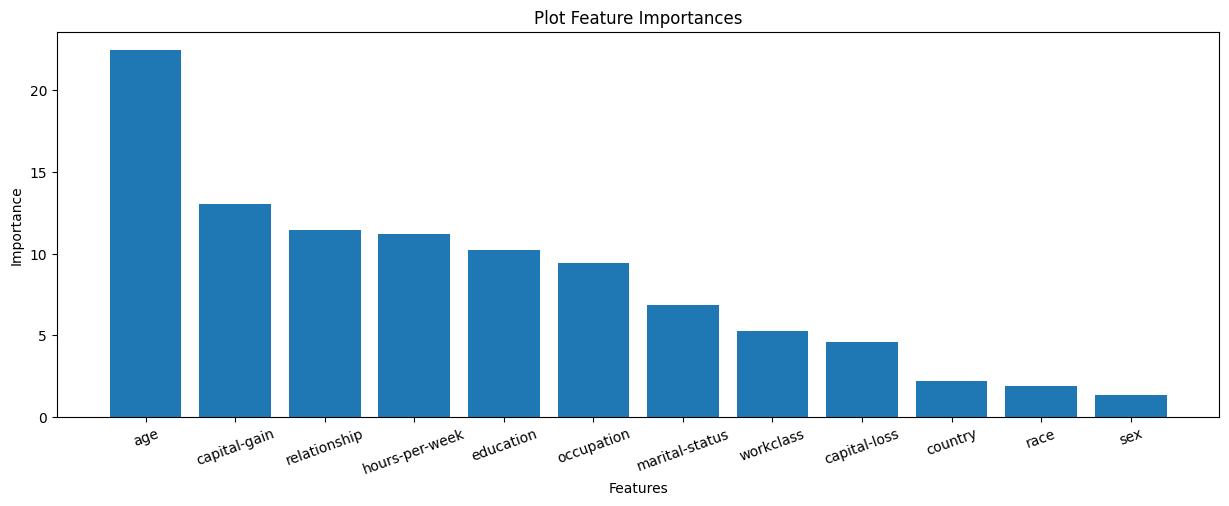

In [20]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

In [21]:
pickle_out = open("model1.pkl", "wb")
pickle.dump(abc, pickle_out)
pickle_out.close()

In [22]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Define models (ensure all necessary imports are already done)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=7),
    "GaussianNB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
accuracy_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy Score: {accuracy_scores[name]:.3f}")

# Compute feature usage score
feature_usage_scores = {}
for name, model in models.items():
    try:
        active_features = np.count_nonzero(model.coef_) if hasattr(model, "coef_") else np.count_nonzero(model.feature_importances_)
    except AttributeError:
        active_features = X_train.shape[1]  # Assume all features are used
    feature_usage_scores[name] = 1 - (active_features / X_train.shape[1])  # Normalize to 0-1 scale

# Define interpretability weights
w1, w2, w3 = 0.5, 0.3, 0.2
complexity_scores = {"Logistic Regression": 5, "Decision Tree": 4, "GaussianNB": 5, "KNN": 2, "SVC": 1, "Random Forest": 2, "XGBoost": 5}
explainability_scores = {"Logistic Regression": 5, "Decision Tree": 5, "GaussianNB": 4, "KNN": 3, "SVC": 2, "Random Forest": 3, "XGBoost": 5}

# Compute interpretability scores
interpretability_scores = {}
for name in models.keys():
    S = (w1 * complexity_scores[name]) + (w2 * feature_usage_scores[name]) + (w3 * explainability_scores[name])
    interpretability_scores[name] = round(S, 3)

# Create result DataFrame
results = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy Score': [accuracy_scores[m] for m in models.keys()],
    'Interpretability Score': [interpretability_scores[m] for m in models.keys()]
})

# Sort the DataFrame by Accuracy Score in descending order
result_df = results.sort_values(by='Accuracy Score', ascending=False).set_index('Model')

# Display the table with borders using tabulate
print("\nModel Performance and Interpretability:")
print(tabulate(result_df, headers='keys', tablefmt='grid', showindex=True))


Logistic Regression Accuracy Score: 0.803
KNN Accuracy Score: 0.828
SVC Accuracy Score: 0.807
Decision Tree Accuracy Score: 0.819
GaussianNB Accuracy Score: 0.804
Random Forest Accuracy Score: 0.851
XGBoost Accuracy Score: 0.877

Model Performance and Interpretability:
+---------------------+------------------+--------------------------+
| Model               |   Accuracy Score |   Interpretability Score |
+=====================+==================+==========================+
| XGBoost             |         0.876651 |                      3.5 |
+---------------------+------------------+--------------------------+
| Random Forest       |         0.850548 |                      1.6 |
+---------------------+------------------+--------------------------+
| KNN                 |         0.827925 |                      1.6 |
+---------------------+------------------+--------------------------+
| Decision Tree       |         0.818815 |                      3   |
+---------------------+-------

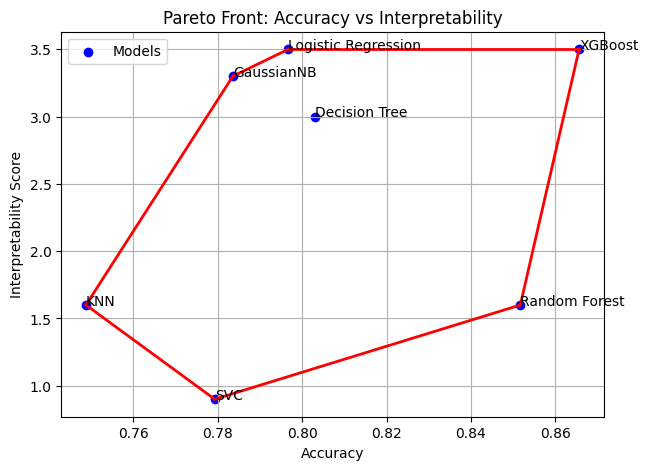


Best Trade-off Model:
Model                XGBoost
Accuracy            0.865621
Interpretability         3.5
combined_score       2.18281
Name: 6, dtype: object


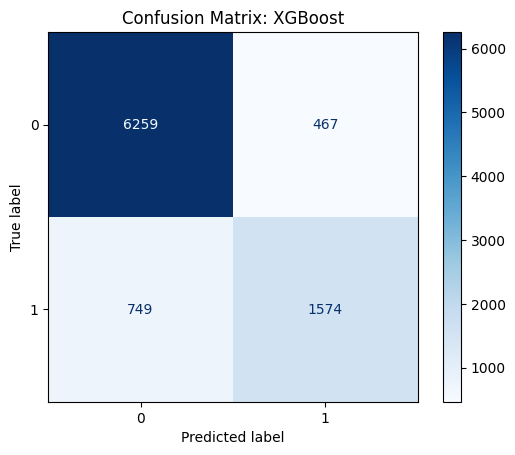


Model Performance (Accuracy and Interpretability):
+---------------------+------------+--------------------+
| Model               |   Accuracy |   Interpretability |
+=====================+============+====================+
| Logistic Regression |   0.796773 |                3.5 |
+---------------------+------------+--------------------+
| KNN                 |   0.748812 |                1.6 |
+---------------------+------------+--------------------+
| SVC                 |   0.779313 |                0.9 |
+---------------------+------------+--------------------+
| Decision Tree       |   0.802962 |                3   |
+---------------------+------------+--------------------+
| GaussianNB          |   0.783622 |                3.3 |
+---------------------+------------+--------------------+
| Random Forest       |   0.851696 |                1.6 |
+---------------------+------------+--------------------+
| XGBoost             |   0.865621 |                3.5 |
+-------------------

In [24]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tabulate import tabulate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load dataset
df = pd.read_csv("adult.csv")

# Handle missing values
df.replace(" ?", np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate Features (X) and Target (Y)
X = df.drop("salary", axis=1)
Y = df["salary"]

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=7),
    "GaussianNB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
accuracy_scores = {}
interpretability_scores = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(Y_test, Y_pred)

    # Compute Interpretability Score
    if hasattr(model, "coef_"):  # Logistic Regression
        active_features = np.count_nonzero(model.coef_)
    elif hasattr(model, "feature_importances_"):  # Tree-based models
        active_features = np.count_nonzero(model.feature_importances_)
    else:  # Black-box models (KNN, SVM, Naive Bayes)
        active_features = X_train.shape[1]

    feature_usage_score = 1 - (active_features / X_train.shape[1])  # Normalize to 0-1 scale

    # Weighted Interpretability Score
    complexity_score = {"Logistic Regression": 5, "Decision Tree": 4, "GaussianNB": 5,
                        "KNN": 2, "SVC": 1, "Random Forest": 2, "XGBoost": 5}
    explainability_score = {"Logistic Regression": 5, "Decision Tree": 5, "GaussianNB": 4,
                            "KNN": 3, "SVC": 2, "Random Forest": 3, "XGBoost": 5}

    w1, w2, w3 = 0.5, 0.3, 0.2  # Weights for complexity, feature usage, and explainability
    interpretability_scores[name] = round(
        w1 * complexity_score[name] + w2 * feature_usage_score + w3 * explainability_score[name], 3
    )

# Create DataFrame
results = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_scores[m] for m in models.keys()],
    "Interpretability": [interpretability_scores[m] for m in models.keys()]
})

# Find Pareto Front (Trade-off Curve)
points = results[['Accuracy', 'Interpretability']].values
pareto_front = ConvexHull(points)

# Plot Accuracy vs Interpretability (Pareto Front)
plt.figure(figsize=(7, 5))
plt.scatter(results["Accuracy"], results["Interpretability"], color="blue", label="Models")

# Highlight Pareto-optimal points
for simplex in pareto_front.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], "r-", lw=2)

for i, txt in enumerate(results["Model"]):
    plt.annotate(txt, (results["Accuracy"][i], results["Interpretability"][i]))

plt.xlabel("Accuracy")
plt.ylabel("Interpretability Score")
plt.title("Pareto Front: Accuracy vs Interpretability")
plt.legend()
plt.grid()
plt.show()

# Best Model based on Pareto Optimization
pareto_models = results.iloc[pareto_front.vertices]
pareto_models['combined_score'] = (pareto_models['Accuracy'] * 0.5 + pareto_models['Interpretability'] * 0.5)

# Sort by combined score to find the best trade-off model
best_tradeoff_model = pareto_models.sort_values(by=["combined_score"], ascending=False).iloc[0]
print("\nBest Trade-off Model:")
print(best_tradeoff_model)

best_model_name = best_tradeoff_model["Model"]
best_model = models[best_model_name]
# Retrain best model on the full training set
best_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_best = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred_best)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cm_display.plot(cmap='Blues', values_format='d')

plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()

# Calculate AUC-ROC Score
Y_prob_best = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc = roc_auc_score(Y_test, Y_prob_best)

# Display results in a better format using tabulate
print("\nModel Performance (Accuracy and Interpretability):")
print(tabulate(results, headers='keys', tablefmt='grid', showindex=False))

precision = precision_score(Y_test, Y_pred_best)
recall = recall_score(Y_test, Y_pred_best)
f1 = f1_score(Y_test, Y_pred_best)

# Print results
print(f"\nPerformance Metrics for {best_model_name}:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC Score: {roc_auc:.2f}")


Best Model: XGBoost with Accuracy: 0.8656
Computing SHAP values for the best model: XGBoost
SHAP Summary Plot for XGBoost


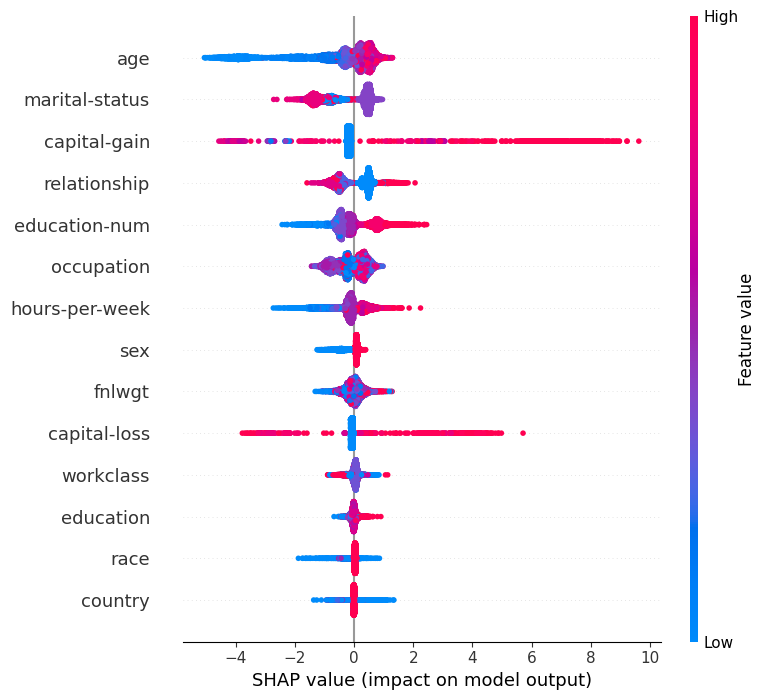

In [25]:
import shap
import numpy as np

# Assuming `models`, `accuracy_scores`, `X_train`, `X_test`, and `best_tradeoff_model` are already defined
# Find the best model based on both accuracy and interpretability (combined score)
best_model_name = best_tradeoff_model["Model"]
best_model = models[best_model_name]

# Display the best model based on the combined score
print(f"Best Model: {best_model_name} with Accuracy: {accuracy_scores[best_model_name]:.4f}")

# SHAP Explainer Selection based on the best model
print(f"Computing SHAP values for the best model: {best_model_name}")

# SHAP Explainer for different models
if best_model_name == "Logistic Regression":
    # Logistic Regression uses LinearExplainer
    explainer = shap.LinearExplainer(best_model, X_train, feature_perturbation="interventional")
    shap_values = explainer.shap_values(X_test)

elif best_model_name in ["Random Forest", "Decision Tree", "XGBoost"]:
    # Tree-based models use TreeExplainer
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

else:  # For KNN, SVC, Naïve Bayes → Use KernelExplainer
    # Approximate using a sample
    explainer = shap.KernelExplainer(best_model.predict, shap.sample(X_train, 100))
    shap_values = explainer.shap_values(X_test[:100])  # Reducing computation time

# SHAP Summary Plot
print(f"SHAP Summary Plot for {best_model_name}")
shap.summary_plot(shap_values, X_test)

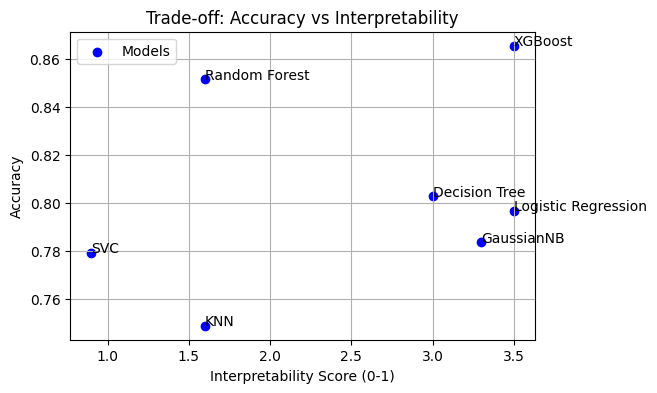

In [26]:
interpretability_values = list(interpretability_scores.values())
accuracy_values = list(accuracy_scores.values())

# Scatter Plot: Accuracy vs Interpretability
plt.figure(figsize=(6, 4))
plt.scatter(interpretability_values, accuracy_values, color="blue", label="Models")

# Add model names as annotations
for i, model_name in enumerate(accuracy_scores.keys()):
    plt.annotate(model_name, (interpretability_values[i], accuracy_values[i]))

plt.xlabel("Interpretability Score (0-1)")
plt.ylabel("Accuracy")
plt.title("Trade-off: Accuracy vs Interpretability")
plt.legend()
plt.grid()
plt.show()

Feature Importances: [0.15587548 0.04298147 0.16650479 0.0381336  0.08798256 0.07469481
 0.07638592 0.08824761 0.01405142 0.02989393 0.08700551 0.02807452
 0.09479928 0.01536909]


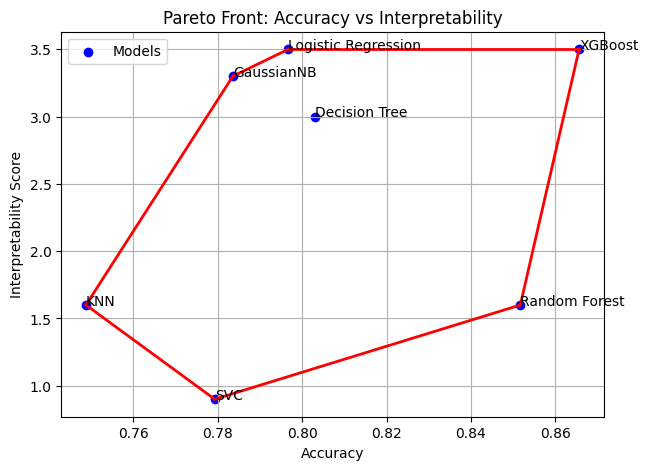


Best Trade-off Model:
Model                XGBoost
Accuracy            0.865621
Interpretability         3.5
combined_score       2.18281
Name: 6, dtype: object


In [27]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import ConvexHull
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("adult.csv")

# Handle missing values
df.replace(" ?", np.nan, inplace=True)
df.dropna(inplace=True)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Separate Features (X) and Target (Y)
X = df.drop("salary", axis=1)
Y = df["salary"]

# Feature Selection using ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X, Y)
feature_importances = classifiern.feature_importances_
print("Feature Importances:", feature_importances)

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=7),
    "GaussianNB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate models
accuracy_scores = {}
interpretability_scores = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(Y_test, Y_pred)

    # Compute Interpretability Score
    if hasattr(model, "coef_"):  # Logistic Regression
        active_features = np.count_nonzero(model.coef_)
    elif hasattr(model, "feature_importances_"):  # Tree-based models
        active_features = np.count_nonzero(model.feature_importances_)
    else:  # Black-box models (KNN, SVM, Naive Bayes)
        active_features = X_train.shape[1]

    feature_usage_score = 1 - (active_features / X_train.shape[1])  # Normalize to 0-1 scale

    # Weighted Interpretability Score
    complexity_score = {"Logistic Regression": 5, "Decision Tree": 4, "GaussianNB": 5,
                        "KNN": 2, "SVC": 1, "Random Forest": 2, "XGBoost": 5}
    explainability_score = {"Logistic Regression": 5, "Decision Tree": 5, "GaussianNB": 4,
                            "KNN": 3, "SVC": 2, "Random Forest": 3, "XGBoost": 5}

    w1, w2, w3 = 0.5, 0.3, 0.2  # Weights for complexity, feature usage, and explainability
    interpretability_scores[name] = round(
        w1 * complexity_score[name] + w2 * feature_usage_score + w3 * explainability_score[name], 3
    )

# Create DataFrame
results = pd.DataFrame({
    "Model": list(models.keys()),
    "Accuracy": [accuracy_scores[m] for m in models.keys()],
    "Interpretability": [interpretability_scores[m] for m in models.keys()]
})

# Find Pareto Front (Trade-off Curve)
points = results[['Accuracy', 'Interpretability']].values
pareto_front = ConvexHull(points)

# Plot Accuracy vs Interpretability (Pareto Front)
plt.figure(figsize=(7, 5))
plt.scatter(results["Accuracy"], results["Interpretability"], color="blue", label="Models")

# Highlight Pareto-optimal points
for simplex in pareto_front.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], "r-", lw=2)

for i, txt in enumerate(results["Model"]):
    plt.annotate(txt, (results["Accuracy"][i], results["Interpretability"][i]))

plt.xlabel("Accuracy")
plt.ylabel("Interpretability Score")
plt.title("Pareto Front: Accuracy vs Interpretability")
plt.legend()
plt.grid()
plt.show()

# Best Model based on Pareto Optimization
pareto_models = results.iloc[pareto_front.vertices]
pareto_models['combined_score'] = (pareto_models['Accuracy'] * 0.5 + pareto_models['Interpretability'] * 0.5)

# Sort by combined score to find the best trade-off model
best_tradeoff_model = pareto_models.sort_values(by=["combined_score"], ascending=False).iloc[0]
print("\nBest Trade-off Model:")
print(best_tradeoff_model)
